In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [10]:
#data collection and processing#united state oil price 
gold_data=pd.read_csv("gold_price_data.csv")
print(gold_data)

           Date          SPX         GLD        USO      SLV   EUR/USD
0      1/2/2008  1447.160034   84.860001  78.470001  15.1800  1.471692
1      1/3/2008  1447.160034   85.570000  78.370003  15.2850  1.474491
2      1/4/2008  1411.630005   85.129997  77.309998  15.1670  1.475492
3      1/7/2008  1416.180054   84.769997  75.500000  15.0530  1.468299
4      1/8/2008  1390.189941   86.779999  76.059998  15.5900  1.557099
...         ...          ...         ...        ...      ...       ...
2285   5/8/2018  2671.919922  124.589996  14.060000  15.5100  1.186789
2286   5/9/2018  2697.790039  124.330002  14.370000  15.5300  1.184722
2287  5/10/2018  2723.070068  125.180000  14.410000  15.7400  1.191753
2288  5/14/2018  2730.129883  124.489998  14.380000  15.5600  1.193118
2289  5/16/2018  2725.780029  122.543800  14.405800  15.4542  1.182033

[2290 rows x 6 columns]


In [11]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [13]:
#no of rows and columns
gold_data.shape

(2290, 6)

In [14]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [15]:
#missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [16]:
#statistical measures
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [19]:
#If you need to keep the date column for other operations
# but exclude it from correlation calculation
numeric_columns = gold_data.select_dtypes(include=['float64', 'int64']).columns
correlation = gold_data[numeric_columns].corr()

<Axes: >

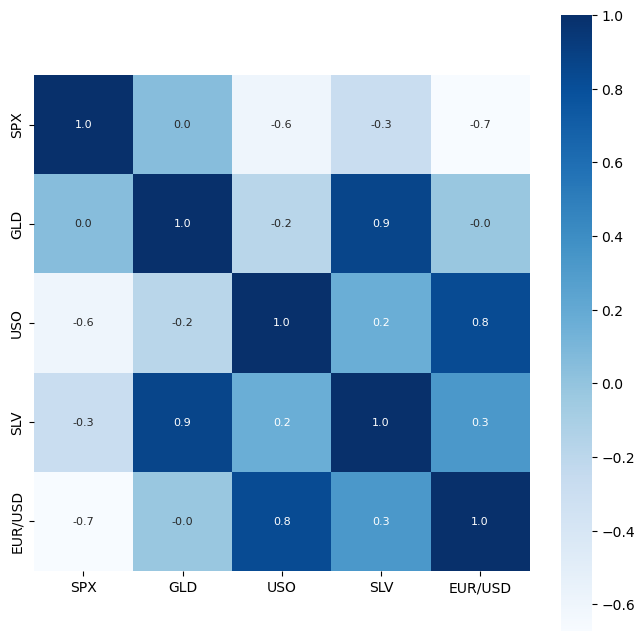

In [23]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt=".1f",annot=True,annot_kws={"size":8},cmap="Blues")

In [25]:
print(correlation["GLD"])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


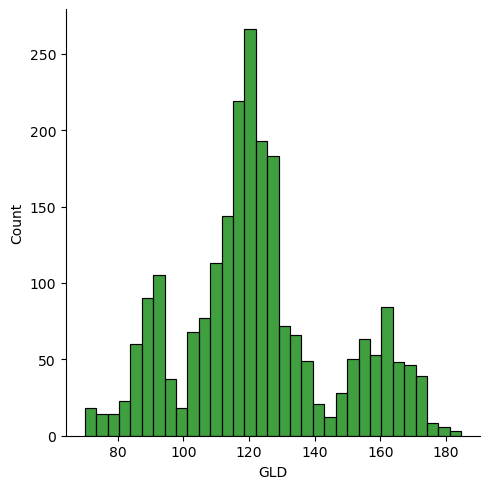

In [27]:
sns.displot(gold_data["GLD"],color="green")

In [28]:
X=gold_data.drop(["Date","GLD"],axis=1)
Y=gold_data['GLD']

In [29]:
X

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [30]:
Y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

In [31]:
X_train, X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [32]:
regressor=RandomForestRegressor(n_estimators=100)

In [33]:
#training the models
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [34]:
test_data_prediction=regressor.predict(X_test)

In [35]:
print(test_data_prediction)

[168.51469884  81.9904997  115.93990023 127.51960055 120.80170148
 154.64479795 150.15259806 126.01770062 117.43909882 125.98910069
 116.75270068 171.92240082 141.42119897 167.66559856 114.99130011
 117.88700028 138.11020264 170.08980037 159.24850202 157.78809925
 154.83840019 125.26910009 176.28519937 157.07840288 125.1186004
  93.87539981  78.28189981 120.09160005 119.06969907 167.50599957
  88.34230048 125.26049982  91.10520085 117.71320054 121.09299916
 136.12910022 115.51440091 115.09630055 146.4558003  107.03690071
 104.5584026   87.23239805 126.56410058 117.69930008 154.07789949
 119.73130011 108.37340023 108.42419868  92.9782001  127.02639782
  74.80130048 113.60929942 121.16450029 111.25879929 118.87729871
 120.78629922 159.49020072 167.95750092 147.22519745  85.92189849
  94.16060027  86.83649888  90.34400038 118.91690082 126.41940029
 127.47120006 169.17589973 122.2402997  117.42849915  98.88540054
 168.3242005  143.10669851 131.90670296 121.22510219 121.64619925
 119.738700

In [36]:
error_score=metrics.r2_score(Y_test,test_data_prediction)
print("R squared error:",error_score)

R squared error: 0.9897636823706784


In [37]:
Y_test=list(Y_test)

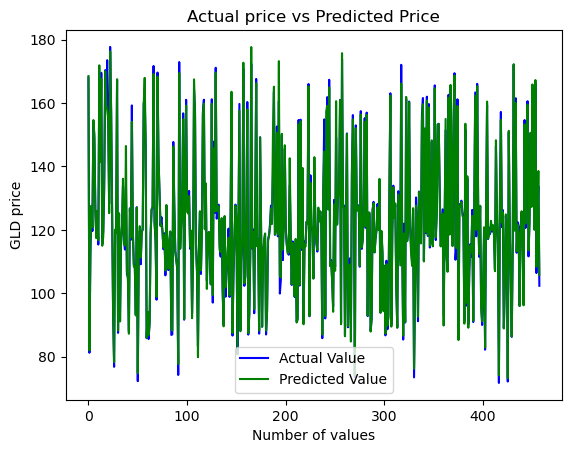

In [42]:
plt.plot(Y_test,color="blue",label="Actual Value")
plt.plot(test_data_prediction,color="green",label="Predicted Value")
plt.title("Actual price vs Predicted Price")
plt.xlabel("Number of values")
plt.ylabel("GLD price")
plt.legend()
plt.show()